# lec12_군집
* ref : https://scikit-learn.org/stable/modules/clustering.html

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.decomposition import PCA

In [63]:
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,RandomForestClassifier
import lightgbm as lgb

import optuna

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import silhouette_samples,silhouette_score

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [88]:
df = pd.read_csv("./datasets/iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   target  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Kmeans
* Step-1: Select the value of K, to decide the number of clusters to be formed.
* Step-2: Select random K points which will act as centroids.
* Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.
* Step-4: place a new centroid of each cluster.
* Step-5: Repeat step no.3, which reassign each datapoint to the new closest centroid of each cluster.
* Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.
* Step-7: FINISH

<pre>
class sklearn.cluster.KMeans(n_clusters=8, random_state=None, 
                             init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0,  copy_x=True, algorithm='lloyd')

In [89]:
y= df["target"]
X = df.drop("target", axis = 1)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=1111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((120, 4), (30, 4), (120,), (30,))

In [91]:
kmeans = KMeans(n_clusters = 3, random_state=1)
kmeans.fit(X_train[["pl","pw"]])
pred = kmeans.predict(X_test[["pl","pw"]])
pred_df = pd.DataFrame(pred,columns = ["pred"])
pred_df["y"] = y_test.values
pred_df[["pl","pw"]] = df[["pl","pw"]]
pred_df.head()

,pred,y,pl,pw
0,2,1,1.4,0.2
1,2,1,1.4,0.2
2,2,1,1.3,0.2
3,0,2,1.5,0.2
4,1,0,1.4,0.2


In [92]:
kmeans.cluster_centers_
# Coordinates of cluster centers.

array([[5.60263158, 2.06315789],
       [1.465     , 0.26      ],
       [4.2547619 , 1.32857143]])

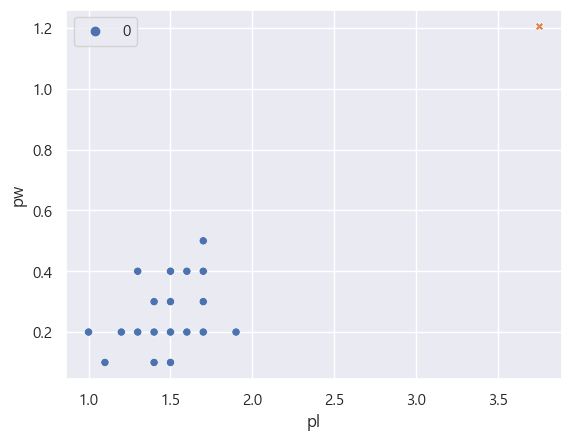

In [101]:
sns.scatterplot(data = pred_df, x="pl",y="pw", hue="pred")
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker="X")
plt.show()

In [102]:
kmeans = KMeans(n_clusters=3,  random_state=11)
kmeans.fit(X_train[['sl','sw']])    #--------- y가 없다
pred = kmeans.predict(X_test[['sl','sw']]) 
# pred_df = pd.DataFrame(pred, columns = ["pred"])
# pred_df['y'] = y_test.values
pred_df = pd.DataFrame({"pred_cluster_label":pred, "y":y_test})
pred_df[['sl','sw']] = X_test[['sl','sw']]
pred_df[pred_df["y"]==2].head()


,pred_cluster_label,y,sl,sw
121,0,2,5.6,2.8
122,1,2,7.7,2.8
105,1,2,7.6,3.0
115,1,2,6.4,3.2
137,1,2,6.4,3.1


In [94]:
kmeans.labels_
# Labels of each point

array([1, 2, 1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0,
       0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2,
       1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 0, 1, 0])

In [103]:
print(kmeans.labels_)
X_train['cluster_label'] = kmeans.labels_
X_test['cluster_label']  = pred

[2 0 2 1 1 2 0 2 2 0 2 1 0 0 2 2 1 1 0 0 2 0 1 1 0 2 2 0 0 0 1 0 1 2 2 1 2
 1 2 1 0 0 0 0 2 0 0 1 0 1 1 2 0 2 1 2 1 2 1 0 1 0 0 1 2 1 1 0 1 0 0 1 0 1
 2 1 2 2 1 0 0 0 2 1 1 2 1 0 2 2 2 1 0 1 1 1 1 2 2 2 1 0 0 0 2 0 0 0 0 2 2
 1 2 2 2 2 0 1 2 1]


In [104]:
from sklearn.metrics import silhouette_samples
train_coef = silhouette_samples(X_train[['sl','sw']], kmeans.labels_, metric='euclidean')
test_coef  = silhouette_samples(X_test[['sl','sw']] , pred, metric='euclidean')
print(train_coef[:5], test_coef[:5])

X_train['sil_coef'] = train_coef
X_test['sil_coef']  = test_coef
X_train.head()

[0.28799288 0.62752383 0.61577075 0.44924986 0.42347725] [0.63652177 0.17027261 0.62174174 0.57983326 0.65483061]


,sl,sw,pl,pw,cluster_label,sil_coef
15,5.7,4.4,1.5,0.4,2,0.287993
79,5.7,2.6,3.5,1.0,0,0.627524
4,5.0,3.6,1.4,0.2,2,0.615771
117,7.7,3.8,6.7,2.2,1,0.449250
118,7.7,2.6,6.9,2.3,1,0.423477


## silhouette_samples
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html
* sklearn.metrics.silhouette_samples(X, labels, *, metric='euclidean', **kwds)
* Compute the Silhouette Coefficient for <b>each sample</b>
* The Silhouette Coefficient is a measure of how well samples are clustered with samples that are similar to themselves.

## 실루엣 계수
* 군집 평가 지표
*  $ { coef = \frac{(b - a)} {max(a, b)} }$
    * a : 군집 내 헤더와 샘플과의 평균거리
    * b : 가장 가까운 군집의 샘플과 헤더와의 평균거리
* 군집내에서는 응집도가 높아야 하고, 타 군집과는 분리가 잘 되어 있어야 함
* -1 (worst) <= 실루엣 계수 <= 1 (best) 
* 0 : overlapping

In [107]:
from sklearn.metrics import silhouette_samples
train_coef = silhouette_samples(X_train[['sl','sw']], kmeans.labels_, metric='euclidean')
test_coef  = silhouette_samples(X_test[['sl','sw']] , pred, metric='euclidean')
print(train_coef[:5], test_coef[:5])

X_train['sil_coef'] = train_coef
X_test['sil_coef']  = test_coef
X_train.head()

[0.28799288 0.62752383 0.61577075 0.44924986 0.42347725] [0.63652177 0.17027261 0.62174174 0.57983326 0.65483061]


,sl,sw,pl,pw,cluster_label,sil_coef
15,5.7,4.4,1.5,0.4,2,0.287993
79,5.7,2.6,3.5,1.0,0,0.627524
4,5.0,3.6,1.4,0.2,2,0.615771
117,7.7,3.8,6.7,2.2,1,0.449250
118,7.7,2.6,6.9,2.3,1,0.423477


## silhouette_score()
* sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)
* 실루엣 계수들의 평균

In [108]:
from sklearn.metrics import silhouette_score
train_coef_mean = silhouette_score(X_train[['sl','sw']], kmeans.labels_, metric='euclidean')
test_coef_mean  = silhouette_score(X_test[['sl','sw']] , pred, metric='euclidean')
print(train_coef_mean, test_coef_mean)


0.4436794159785156 0.44225760468215164


In [109]:
X_train['sil_coef'].mean(), X_test['sil_coef'].mean()

(0.4436794159785156, 0.44225760468215164)

In [110]:
X_train.groupby('cluster_label')['sil_coef'].mean()

cluster_label
0    0.385378
1    0.463998
2    0.483627
Name: sil_coef, dtype: float64

In [111]:
X_test.groupby('cluster_label')['sil_coef'].mean()

cluster_label
0    0.477535
1    0.323734
2    0.494744
Name: sil_coef, dtype: float64

In [112]:
kmeans.inertia_
print(f"응집도 : {kmeans.inertia_:.4f}") 
# Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.(응집도)

응집도 : 31.0811


In [113]:
n_clusters_list = [2,3,4,5]
inertia_list = []
for k in n_clusters_list:
    kmeans = KMeans(n_clusters=k,  random_state=11) # ---- n_clusters=k
    kmeans.fit(X_train[['pl','pw']])                # ---- y가 없다
    pred = kmeans.predict(X_test[['pl','pw']]) 
    pred_df = pd.DataFrame({"pred_cluster_label":pred, "y":y_test})
    pred_df[['pl','pw']] = X_test[['pl','pw']]

    #X_train['sil_coef'] = silhouette_samples(X_train[['sl','sw']], kmeans.labels_, metric='euclidean')
    train_coef_mean = silhouette_score(X_train[['pl','pw']], kmeans.labels_, metric='euclidean')
    print(f"{k} 실루엣점수: {train_coef_mean:.4f}")
    
    #print(kmeans.cluster_centers_)
    
    inertia_list.append([k, kmeans.inertia_] )
print(inertia_list)    

2 실루엣점수: 0.7584
3 실루엣점수: 0.6668
4 실루엣점수: 0.6334
5 실루엣점수: 0.6019
[[2, 71.05743748070392], [3, 25.034919799498773], [4, 14.809459073493557], [5, 10.804202135774217]]


In [116]:
temp_df = pd.DataFrame(inertia_list, columns=["k", "inertia"])
temp_df.head()

,k,inertia
0,2,71.057437
1,3,25.034920
2,4,14.809459
3,5,10.804202


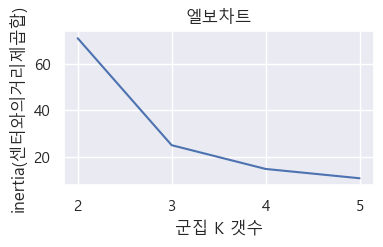

In [117]:
plt.figure(figsize=(4,2))
plt.plot(temp_df["k"], temp_df["inertia"])
plt.title("엘보차트")
plt.xlabel("군집 K 갯수")
plt.ylabel("inertia(센터와의거리제곱합)")
plt.show()

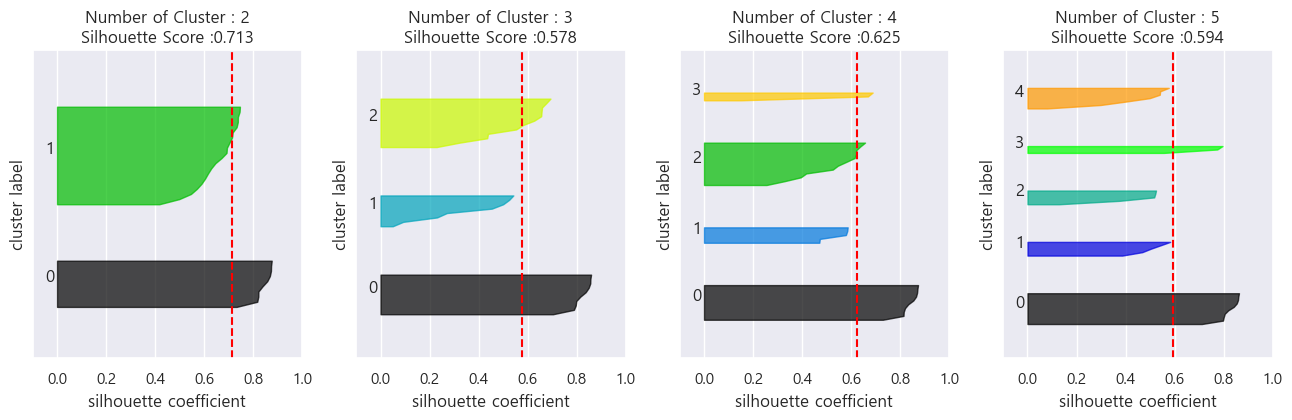

In [83]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

    
def my_chart(cluster_lists, X): 
    
    fig, axs = plt.subplots(figsize=(4*len(cluster_lists), 4), 
                            nrows=1, 
                            ncols=len(cluster_lists))

    for ind, k in enumerate(cluster_lists):
        
        kmeans = KMeans(n_clusters = k , 
                           max_iter=500, random_state=0)
        cluster_labels = kmeans.fit_predict(X)

        sil_coef_mean = silhouette_score(X, cluster_labels)
        sil_coef      = silhouette_samples(X, cluster_labels)
        
        X['pred_cluster_label'] = cluster_labels
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(k)+'\n' \
                          'Silhouette Score :' + str(round(sil_coef_mean,3)) )
        axs[ind].set_xlabel("silhouette coefficient")
        axs[ind].set_ylabel("cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X) + (k + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 막대 그래프
        for i in range(k):
            ith_cluster_sil_coef = sil_coef[cluster_labels==i]
            ith_cluster_sil_coef.sort()

            size_cluster_i = ith_cluster_sil_coef.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / k)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_coef, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_coef_mean, color="red", linestyle="--")
my_chart([2,3,4,5], X_test)

*  cluster 4개이상 되면 바가 너무 얇아짐 샘플 수가 너무 적다 >> 부적합

In [118]:
X.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


For n_clusters = 2 The average silhouette_score is : 0.7583692207152315
For n_clusters = 3 The average silhouette_score is : 0.6668069630287282
For n_clusters = 4 The average silhouette_score is : 0.6334496863112897
For n_clusters = 5 The average silhouette_score is : 0.6004316636907646


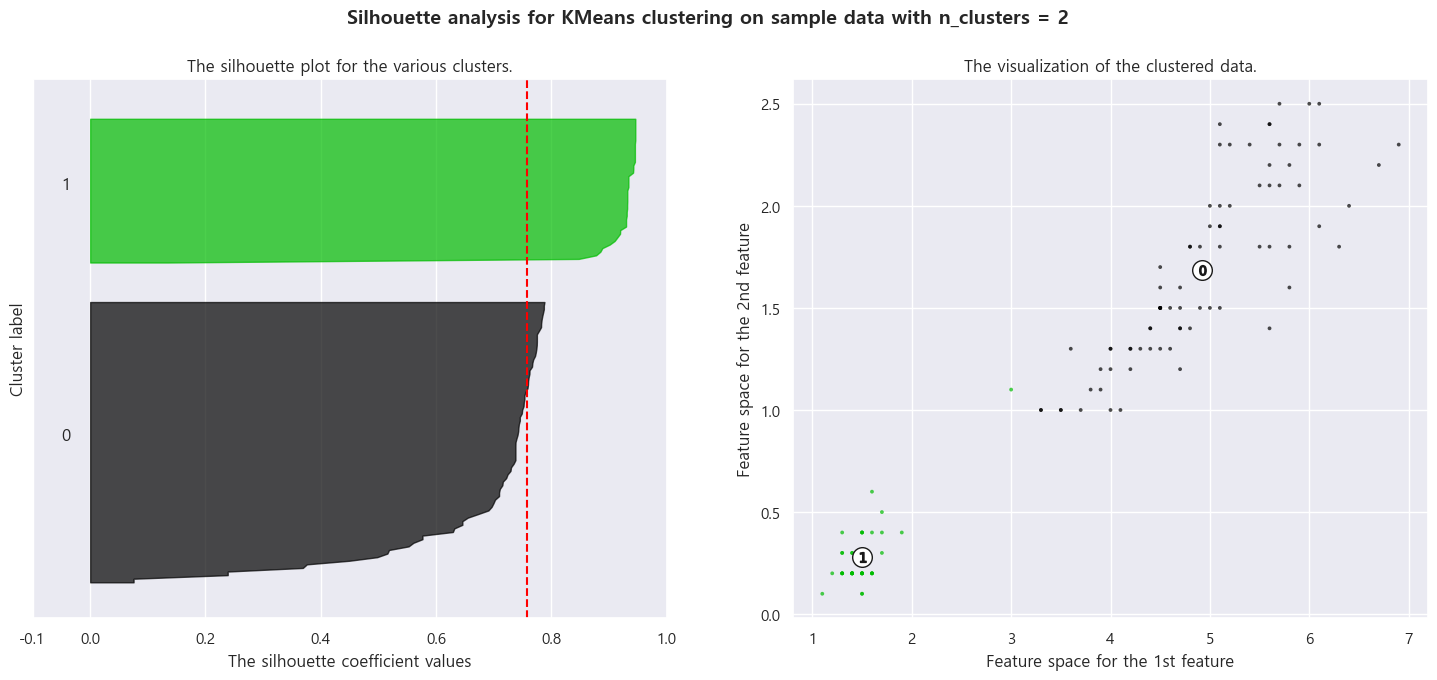

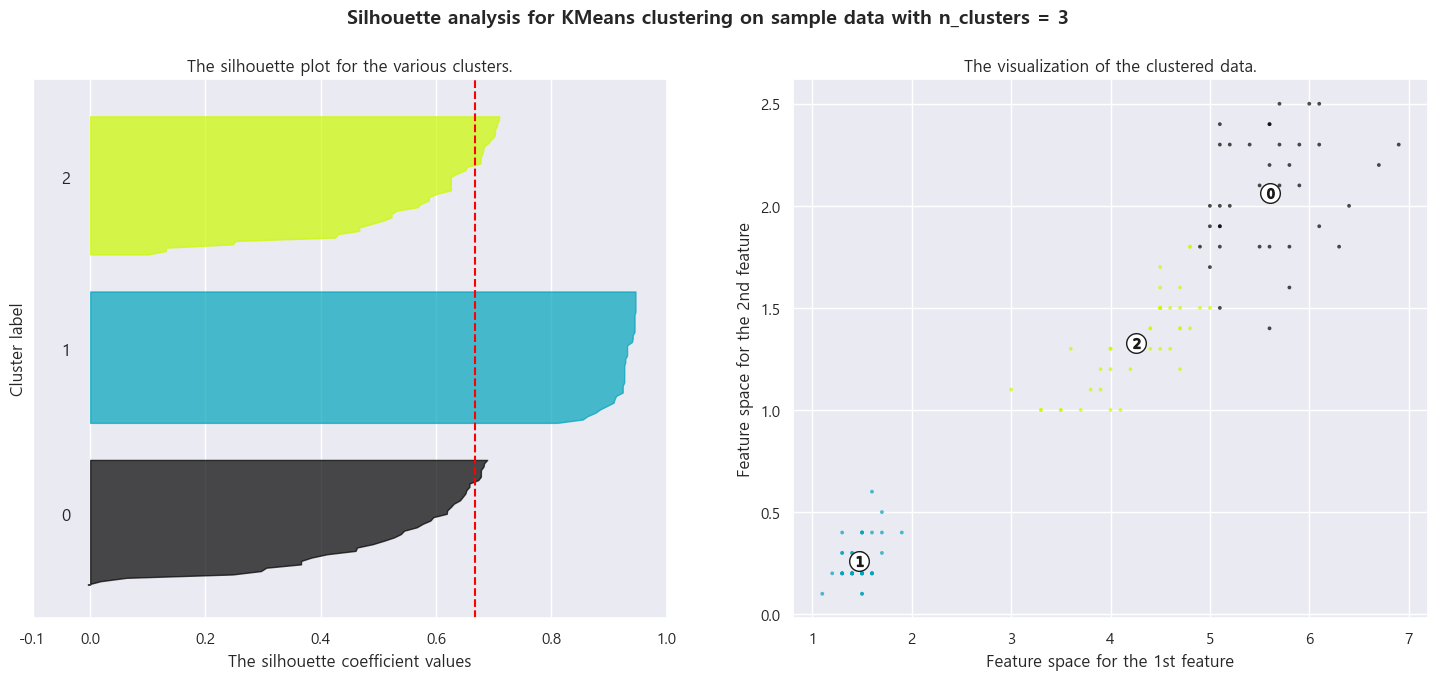

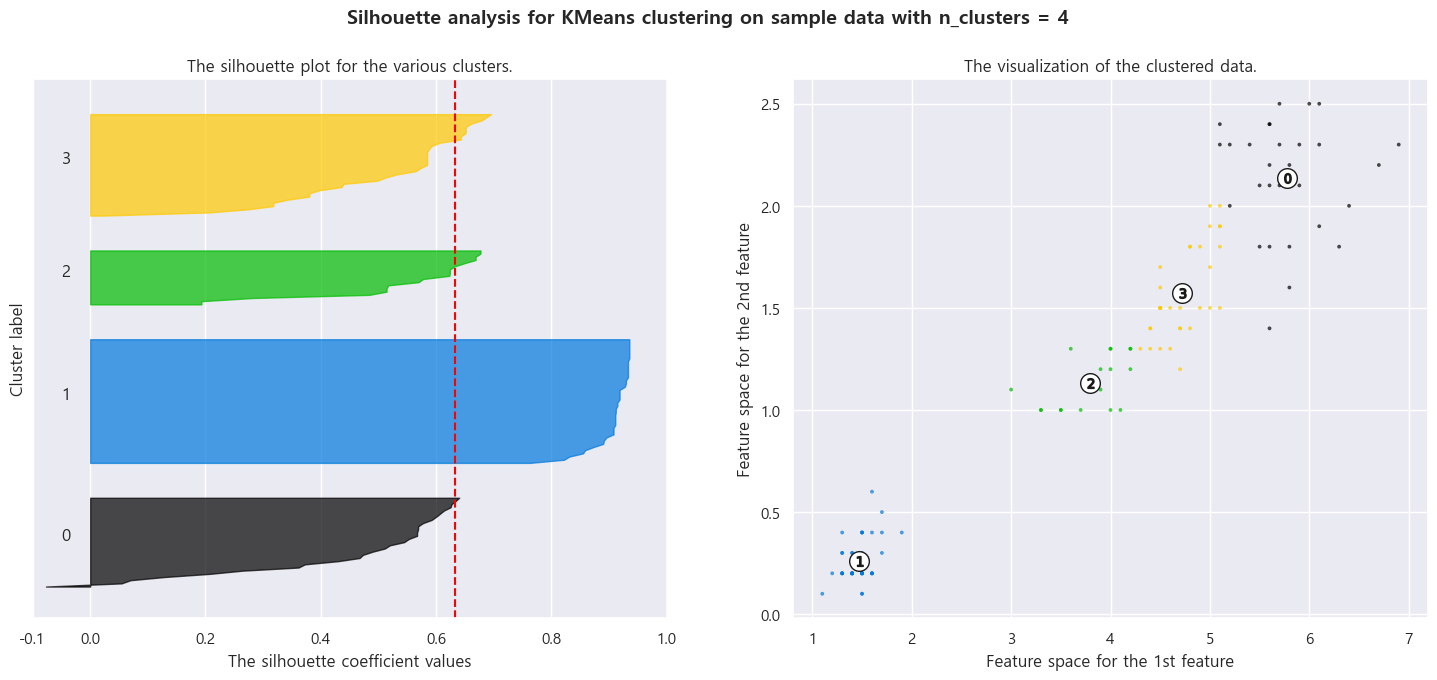

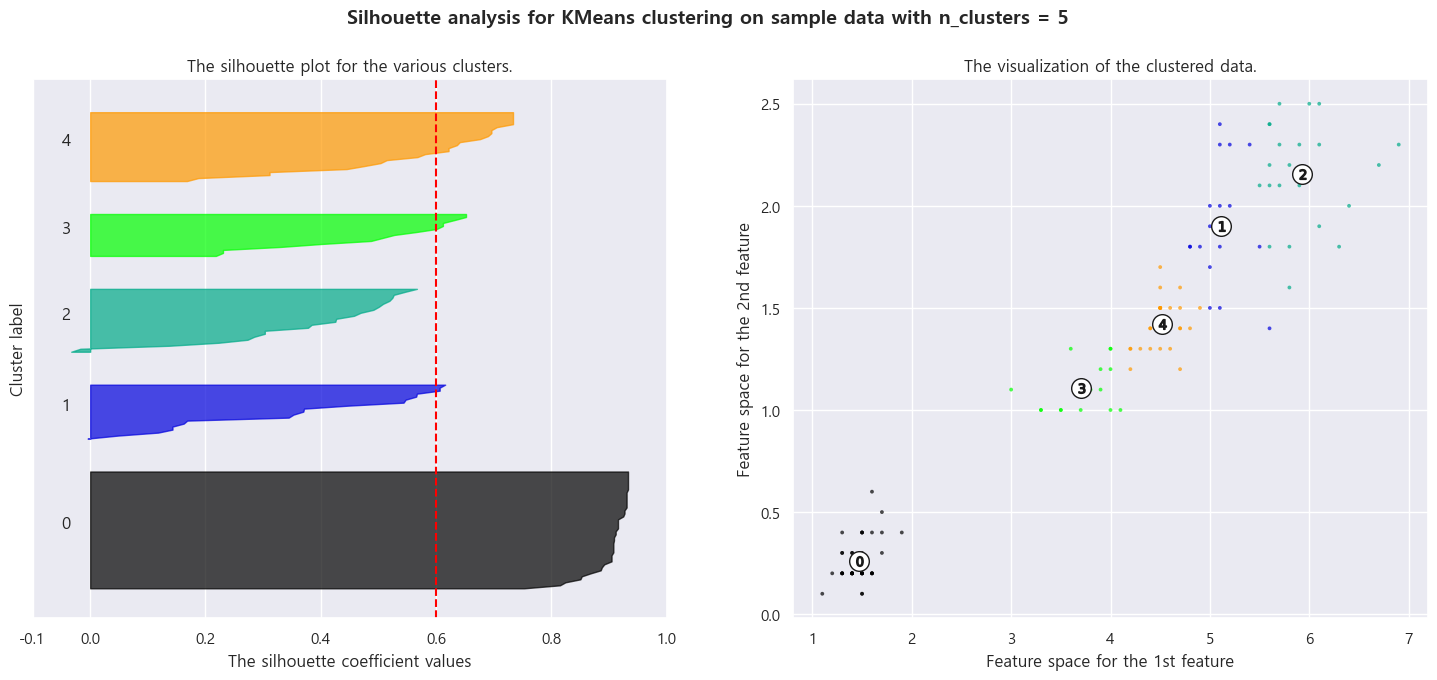

In [119]:
X = X_train[['pl','pw']]
for n_clusters in [2,3,4,5]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters,  random_state=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# DBSCAN
* DBSCAN (Density-based spatial clustering of applications with noise)
* <b>밀도</b>가 높은 부분을 중심으로 클러스터링을 하는 방식
* 반경(Eps) 내에 점이 n개 이상(MinPts) 있으면 군집화

<img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-29.png">

* Core Point   : 반경(Eps) 내 최소 데이터(MinPts) 수 만족(6)
* Border Point : 반경(Eps) 내 최소 데이터(MinPts) 수 불만족(2)
                 반경내에 core point 존재
* Noise Point  : 반경(Eps) 내 최소 데이터(MinPts) 수 불만족(2)

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdMxBgo%2FbtrAtLgV5Xk%2FBusyALKYOEMqkL4MI0lkJ1%2Fimg.png">

* 기하학적 분포를 가진 데이터 군집할때 편리 > 선형분리가 불가능 할때
* 밀집도의 차이가 없으면 군집 못함

<pre>
sklearn.cluster.DBSCAN( eps=0.5, min_samples=5, 
                       metric='euclidean',metric_params=None, algorithm='auto', leaf_size=30, p=2, sample_weight=None, n_jobs=None)

In [128]:
from sklearn.cluster import DBSCAN

In [141]:
eps_list = [0.3,0.5,0.7]
min_samples = [3,5,7]
for eps in eps_list:
    for sample in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=sample)
        cluster_labels = dbscan.fit_predict(X)
        sil_coef_mean = silhouette_score(X, cluster_labels)
        sil_coef      = silhouette_samples(X, cluster_labels)  
        print(f"{eps}  {sample} sil_coef_mean : {sil_coef_mean:.4f}")

0.3  3 sil_coef_mean : 0.3336
0.3  5 sil_coef_mean : 0.4898
0.3  7 sil_coef_mean : 0.5499
0.5  3 sil_coef_mean : 0.7605
0.5  5 sil_coef_mean : 0.5471
0.5  7 sil_coef_mean : 0.5523
0.7  3 sil_coef_mean : 0.7605
0.7  5 sil_coef_mean : 0.7605
0.7  7 sil_coef_mean : 0.7605


## 최적의 eps, min_sample 찾기
* 유클리드 거리 활용

<img src = "https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-32.png">

*  노드수가 급격히 늘어나는 지점 >  분류가 잘되는 지점

In [142]:
def my_find_eps(x, k):
    eps_list =[]
    for x in range(len(X)) : 
        uc_list =[]
        for j in range(len(X)) : 
            uc_dist = np.sqrt ( ( Xiloc[i,0] - X[j,0] )**2  + ( X[i,1] - X[j,2] )**2 )
        uc_list.append(uc_dist)
        eps_list.append(uc_list[k])
    return uc_list


In [ ]:
k = [4,5,6,7]
my_find_eps(X,k)

In [134]:
dbscan.labels_

array([ 0,  1,  0,  1, -1,  0,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,
        0,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  0,  1,  1,
        0,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,
        1,  1,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,
        1], dtype=int64)

In [136]:
from sklearn.metrics import silhouette_score
train_coef_mean = silhouette_score(X_train[['sl','sw']], dbscan.labels_, metric='euclidean')
# test_coef_mean  = silhouette_score(X_test[['sl','sw']] , pred, metric='euclidean')
print(train_coef_mean)


0.3422459681334443


# HIRACHY
* 단일기준결합방식 (single)   : 각 군집에서 중심으로부터 거리가 가까운 점과의 거리 계산
* 완전기준결합방식 (complete) : 각 군집에서 중심으로부터 가장 먼 점과의 거리 계산
* 평균기준결합방식 (average)  : 한 군집과 다른 군집에 속해 있는 모든 점과의 거리 계산

<img src = "https://drek4537l1klr.cloudfront.net/rhys/v-7/Figures/CH17_FIG_3_MLR.png">

<pre>
최단 : <img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-33.png" width=400>
최장 : <img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-34.png" width=400>
평균 : <img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-35-768x341.png" width=400>

In [148]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

<pre>
scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)

scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')

scipy.cluster.hierarchy.cut_tree(Z, n_clusters=None, height=None)


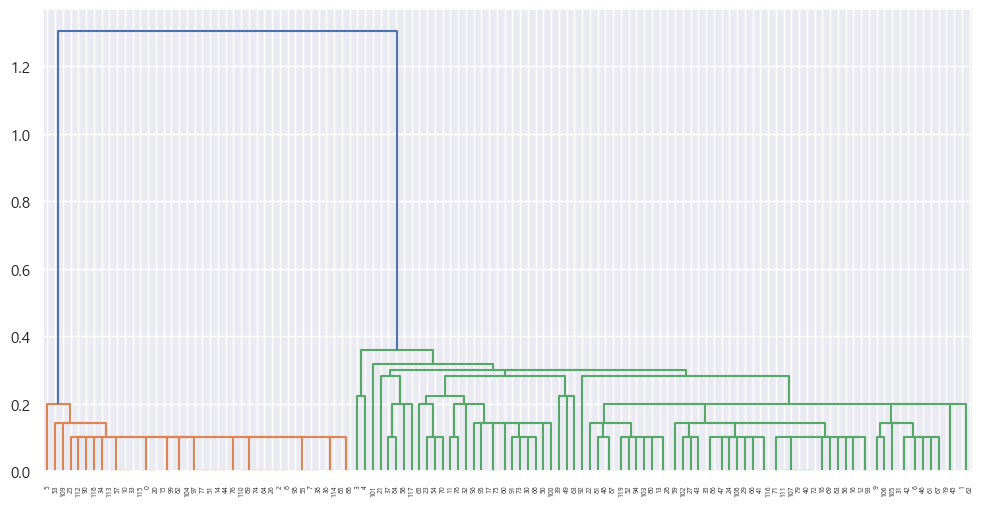

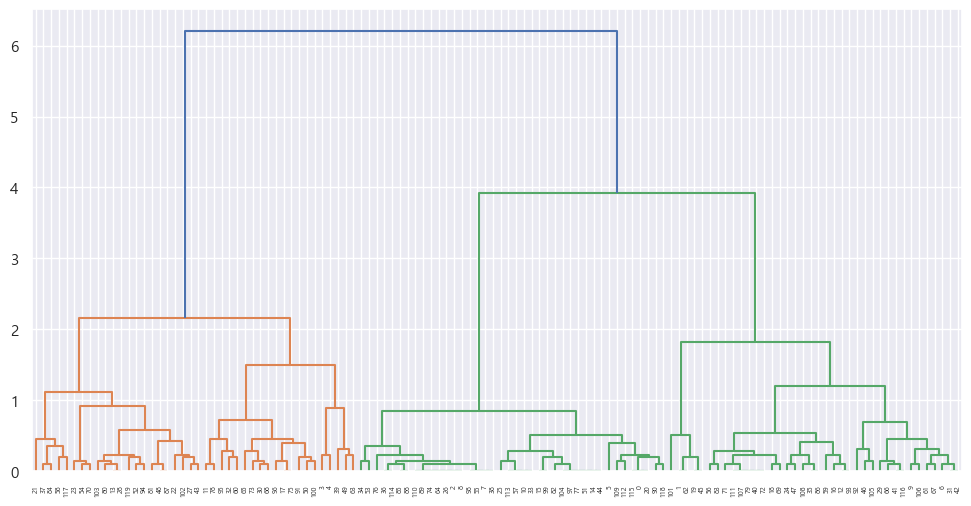

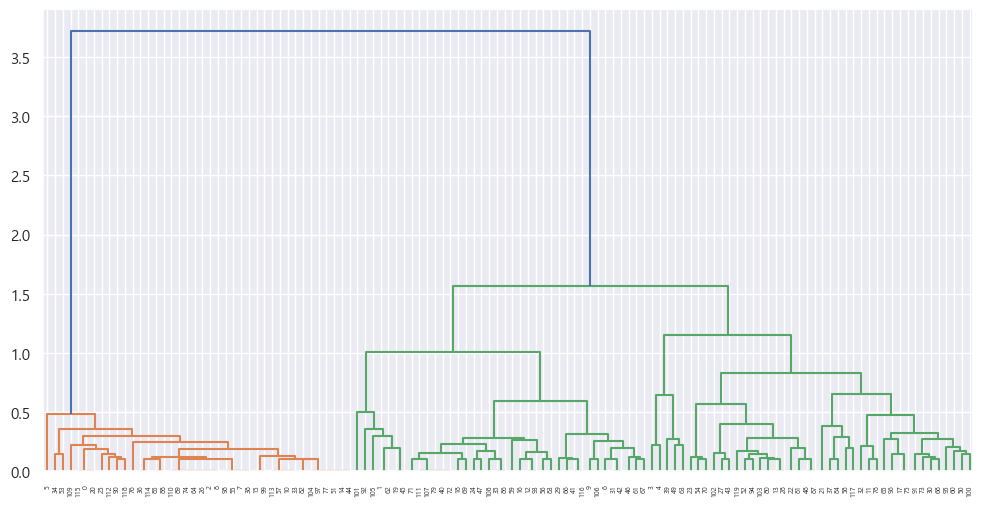

In [150]:
method_list = ["single","complete","average"]
for method in method_list:
    dist = linkage(X, method=method)
    tree_res = cut_tree(dist)
    # print(tree_res)
    plt.figure(figsize = (12,6))
    dendrogram(dist)
    plt.show()
    